In [1]:
import pandas as pd
import datetime
from sklearn.metrics import adjusted_rand_score

# Speaker tags per character

In [4]:
df = pd.read_csv("/home/ada/Documents/DTA/Thesis/Data/preliminary_errorAnalysis_punisher.csv")

In [5]:
df = df[['Speaker', 'Actual']]
filtered_df = df[df['Actual'].notnull()]
filtered_df['Actual'] = filtered_df['Actual'].str.replace('tied up man','Micro')
no_none = filtered_df.drop(filtered_df[filtered_df.Actual == "none"].index)

/tmp/ipykernel_102269/3102052366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Actual'] = filtered_df['Actual'].str.replace('tied up man','Micro')


<AxesSubplot: title={'center': 'Speaker tags per character'}, xlabel='Character'>

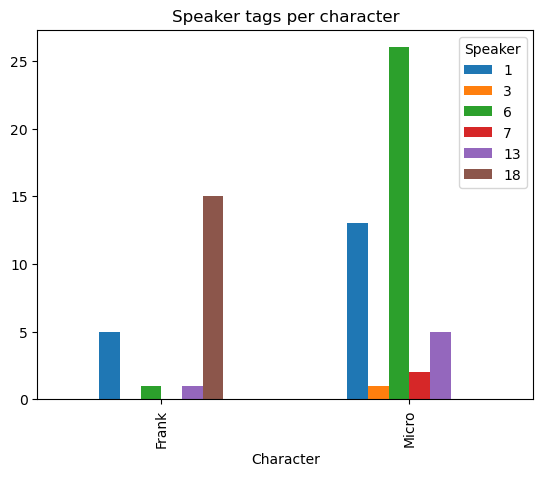

In [6]:
ax = pd.crosstab(no_none['Actual'],no_none['Speaker']).plot.bar(xlabel='Character', title='Speaker tags per character')
ax

In [75]:
#ax.figure.savefig('/home/ada/Documents/DTA/Thesis/Data/the_punisher_E3_plot.png')

# Adjusted Rand Index

In [10]:
speaker = filtered_df['Speaker'].tolist()
actual = filtered_df['Actual'].tolist()

In [12]:
adjusted_rand_score(speaker, actual)

0.3330668625770543

In [13]:
speaker = no_none['Speaker'].tolist()
actual = no_none['Actual'].tolist()

In [14]:
adjusted_rand_score(speaker, actual)

0.2899481509894973

# Segment Length Analysis

In [15]:
df = pd.read_csv("/home/ada/Documents/DTA/Thesis/Data/S01E03_formatted.csv")
df = df[df['Actual'].notnull()]
df['Actual'] = df['Actual'].str.replace('tied up man','Micro')
df = df.drop(df[df.Actual == "none"].index)

In [16]:
df

,Start,Stop,Unnamed: 2,Start_formatted,Stop_formatted,Speaker,Actual,Clarity
1,19.465312,19.617188,NaN,0 days 00:00:19.465312,0 days 00:00:19.617188,7,Micro,Non-verbal
2,37.352812,37.943438,NaN,0 days 00:00:37.352813,0 days 00:00:37.943438,6,Micro,NaN
3,40.356563,43.377187,NaN,0 days 00:00:40.356563,0 days 00:00:43.377188,13,Micro,NaN
4,45.284062,51.122813,NaN,0 days 00:00:45.284063,0 days 00:00:51.122813,6,Micro,NaN
5,52.793438,57.602812,NaN,0 days 00:00:52.793438,0 days 00:00:57.602813,6,Micro,NaN
...,...,...,...,...,...,...,...,...
71,397.279688,397.988437,NaN,0 days 00:06:37.279688,0 days 00:06:37.988437,18,Frank,NaN
72,408.417188,412.737188,NaN,0 days 00:06:48.417188,0 days 00:06:52.737188,18,Frank,NaN
73,413.344688,415.015312,NaN,0 days 00:06:53.344688,0 days 00:06:55.015313,18,Frank,NaN
74,425.005313,426.000938,NaN,0 days 00:07:05.005313,0 days 00:07:06.000938,13,Micro,NaN


In [17]:
# Making dataframe of all instances where Micro was tagged as 6 and Frank as 18, since this was the most common tag for either and therefore "correct"
correct_Micro = df[(df['Actual'] == "Micro") & (df['Speaker'] == 6)]
correct_Frank = df[(df['Actual'] == "Frank") & (df['Speaker'] == 18)]
correct = pd.concat([correct_Micro, correct_Frank])

In [18]:
# Making dataframe of all instances where Micro and Frank were tagged as anything other than 6 and 18 respectively
incorrect = (pd.merge(df,correct, indicator=True, how='outer')
         .query('_merge=="left_only"')
         .drop('_merge', axis=1))
incorrect.head()

,Start,Stop,Unnamed: 2,Start_formatted,Stop_formatted,Speaker,Actual,Clarity
0,19.465312,19.617188,NaN,0 days 00:00:19.465312,0 days 00:00:19.617188,7,Micro,Non-verbal
2,40.356563,43.377187,NaN,0 days 00:00:40.356563,0 days 00:00:43.377188,13,Micro,NaN
24,151.461563,152.288437,NaN,0 days 00:02:31.461563,0 days 00:02:32.288437,3,Micro,NaN
25,231.482812,231.499687,NaN,0 days 00:03:51.482812,0 days 00:03:51.499687,1,Micro,yelling
27,239.329688,239.380313,NaN,0 days 00:03:59.329688,0 days 00:03:59.380313,1,Micro,NaN


In [19]:
correct.head()

,Start,Stop,Unnamed: 2,Start_formatted,Stop_formatted,Speaker,Actual,Clarity
2,37.352812,37.943438,NaN,0 days 00:00:37.352813,0 days 00:00:37.943438,6,Micro,NaN
4,45.284062,51.122813,NaN,0 days 00:00:45.284063,0 days 00:00:51.122813,6,Micro,NaN
5,52.793438,57.602812,NaN,0 days 00:00:52.793438,0 days 00:00:57.602813,6,Micro,NaN
6,59.205937,63.171563,NaN,0 days 00:00:59.205938,0 days 00:01:03.171563,6,Micro,NaN
7,75.777187,76.350938,NaN,0 days 00:01:15.777187,0 days 00:01:16.350938,6,Micro,NaN


In [20]:
correct_lengths = correct['Stop'] - correct['Start']
print(correct_lengths.mean())
print(correct_lengths.min())
print(correct_lengths.max())

2.126249999999998
0.033749999999997726
5.8387500000000045


In [21]:
incorrect_lengths = incorrect['Stop'] - incorrect['Start']
print(incorrect_lengths.mean())
print(incorrect_lengths.min())
print(incorrect_lengths.max())

0.7654017857142863
0.01687499999997044
4.066875000000039


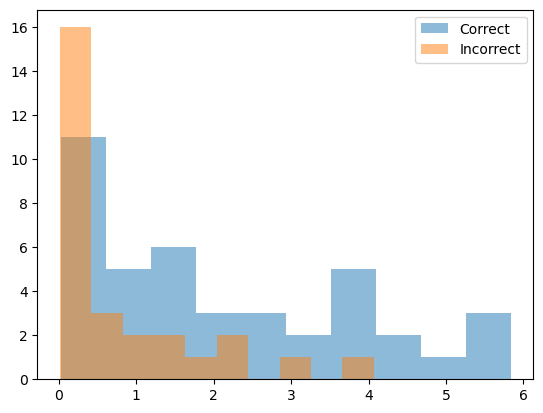

In [24]:
import numpy
import matplotlib.pyplot as plt

fig = plt.figure()
plt.hist(correct_lengths, alpha=0.5, label='Correct')
plt.hist(incorrect_lengths, alpha=0.5, label='Incorrect')
plt.legend(loc='upper right')
plt.show()
#fig.savefig('/home/ada/Documents/DTA/Thesis/Data/segment_lengths.png', dpi=fig.dpi)

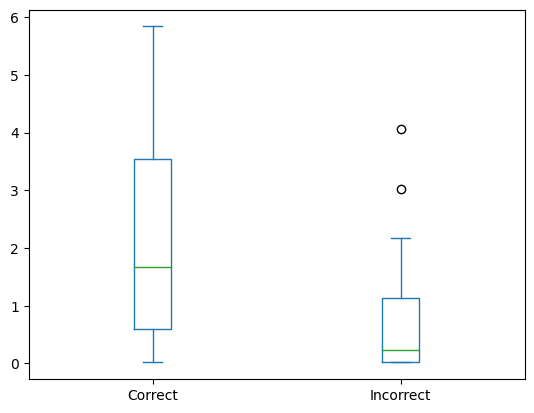

In [28]:
df = pd.concat([correct_lengths, incorrect_lengths], axis=1)
df.columns = ['Correct', 'Incorrect']
ax = df.plot.box()
#ax.figure.savefig('/home/ada/Documents/DTA/Thesis/Data/the_punisher_E3_boxplot.png')

# Updated Adjusted Rand Index

After removing segments of less than 0.4s

In [11]:
df = pd.read_csv("/home/ada/Documents/DTA/Thesis/Data/preliminary_errorAnalysis_punisher.csv")
df = df[df['Stop'] - df['Start'] > 0.4]

In [12]:
df = df[['Speaker', 'Actual']]
filtered_df = df[df['Actual'].notnull()]
filtered_df['Actual'] = filtered_df['Actual'].str.replace('tied up man','Micro')
no_none = filtered_df.drop(filtered_df[filtered_df.Actual == "none"].index)

/tmp/ipykernel_102269/3102052366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Actual'] = filtered_df['Actual'].str.replace('tied up man','Micro')


In [13]:
speaker = filtered_df['Speaker'].tolist()
actual = filtered_df['Actual'].tolist()

In [14]:
adjusted_rand_score(speaker, actual)

0.507114800266805

In [15]:
speaker = no_none['Speaker'].tolist()
actual = no_none['Actual'].tolist()

In [16]:
adjusted_rand_score(speaker, actual)

0.48322367076709305